## Lab 3: Assessed
# Scientific visualisation


### Notes
It is recommended to keep the lecture notes open while doing this lab exercise.

**This exercise is assessed**. Make sure you upload your solution by the deadline. See the notes at the bottom of this notebook for submission guidance.  This exercise is manually graded.

### References
If you are stuck, the following resources are very helpful:

* [Introduction to Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
* [Matplotlib command summary](https://matplotlib.org/api/pyplot_summary.html)




In [60]:
# Standard imports
# Make sure you run this cell!
from __future__ import print_function, division
import numpy as np  # NumPy
%matplotlib notebook
# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt

print("Everything imported OK")


Everything imported OK


## Purpose of this lab
This lab should help you:
* understand how to use Matplotlib for basic plotting tasks
* create simple, clean and correct 2D plots of two variables 
* create plots with multiple conditions
* plot basic statistics of datasets, representing uncertainty appropriately
* explicitly criticise existing visualisations and  suggest and implement concrete suggestions to improve them


# matplotlib Tutorial
We'll go through the first example from the lecture notes. You'll need to apply these ideas yourself later, so make sure you understand what happens here. This part of the lab is for information, and is not part of the assessment.

**Follow this tutorial carefully before attempting the lab exercise below**

In this example, the plotting commands are split up among notebook cells so that each step can be explained. In your code, just have all of the commands in one cell, to avoid having to scroll up and down as you make changes.

### Some data
This data is synthetic. It's a simple trigonometric function; the details don't particularly matter.

In [85]:
# a simple function, returns pulses with a shape determined by k
def pulse(x, k):
    return np.cos(x) * np.exp(np.cos(x) * k - k)

## generate an x value to be transformed
x = np.linspace(-3*np.pi, 3 * np.pi, 500)

### Figures
To begin any plotting we must create a **figure**, which is a "blank canvas" onto which we can add visualisations. **Important: the visualisation will always appear in the output of whichever cell has the `plt.figure()` call.** As a consequence, all of the commands below will affect in the output of the cell below.

When you go through the various steps below, scroll back up to this cell to see their effect. Note that usually all plotting commands go in *one* cell, so we don't end up scrolling about.

<IPython.core.display.Javascript object>


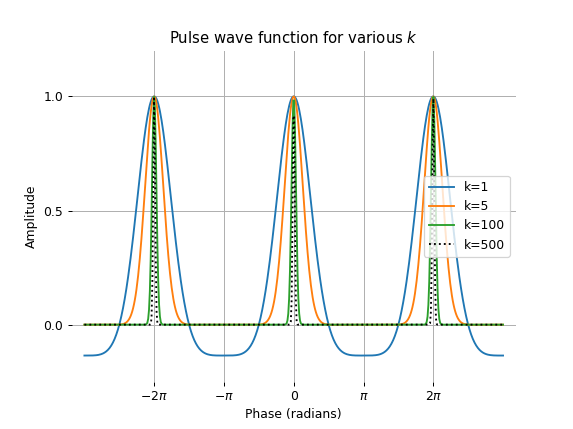

In [86]:
fig = plt.figure()  # create a new figure. It will be blank.

## Axes
To draw anything, we must define **axes**. Each axes is a facet of a plot. It has a coordinate system which can be used to draw data. 

The call to create a new axis is formatted `fig.add_subplot(rows, columns, index)` which will create a subplot in a matrix of axes indexed by the index. The index increases column-wise, then row-wise, and starts from *1* (not 0!)

For example, we could create a 3x2 array of plots, and select the middle-left plot
using `plt.add_subplot(3, 2, 3)`

        --------
       | 1 | 2 |
       | 3 | 4 |
       | 5 | 6 |
       ---------

Most of the time, though, we just want one axes that fills the figure and `fig.add_subplot(1,1,1)` does that. The object it returns is what we use for all subsequent plotting.

In [87]:
ax = fig.add_subplot(1, 1, 1)  
# create a new subplot, returning a set of axes
# look above ^ ^ at the figure. You should see the axes appear


We make a line plot of `x` against `f(x, k)` for a few fixed values of `k`.
Each subsequent plot will be a new color, and all of the plots will be overlaid on the axes

`ax.plot(x,y)` is the basic line plotting command. It is called on an axes object.

Note that the `label=` gives a label that the `legend` command will use to label the graph afterwards. Always label plots if you want readers to be able to distinguish them.

In [116]:
ax.cla()  # cla means to clear axes. 
# it does nothing the first time we run it, but it will clear the plot and redraw if
# you run this cell multiple times. Try commenting it out and running this cell twice!


ax.plot(x, pulse(x,1), label='k=1')
ax.plot(x, pulse(x, 5), label='k=5')
ax.plot(x, pulse(x, 100), label='k=100')

# you can adjust the styling of the plot manually: 
#   here the color is black ("k") 
#   and the linestyle is dotted (":")
ax.plot(x, pulse(x, 500), label='k=500', color='k', linestyle=':')

## note that there are several built-in colors called
# C0, C1, C2, C3, C4, C5, and C6
# they will generally look good
# try changing the 'k' above to 'C6'

**Look above to see the result**. Notice the different colouring. Repeated plots on one axis create new **layers** in the visualisation.

Now we can add **labels** to the plot. There should always be a label for the x-axis, y-axis and a title for the axes. We should also have a **legend** if multiple layers are used. `ax.legend()` will draw one. It can be configured in many ways, but the defaults are fine here.

In [117]:
# label the plot 
ax.set_xlabel("Phase (radians)")  # x-axis label
ax.set_ylabel("Amplitude")        # y-axis label
ax.set_title("Pulse wave function for various $k$")  # title of plot (appears above plot)

# create a legend (key) for the plot, using the labels specified
# in the ax.plot() calls
ax.legend()

By default, the scaling of the axis will be adjusted to fit the data. This isn't always a good idea, so you can adjust it manually. The axis limits are set by `ax.set_xlim(min,max)` and `ax.set_ylim(min,max)` and these adjust the scaling of the axes. This configures the **coords** used to draw data.

You can try changing these to see different parts of the curve.

**Note that you don't need to call the plot commands again when you update the axis limits.**

In [90]:
## set the limits of the plot
# (if this is omitted, sensible autoscaling will be applied)
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(-0.25, 1.2)

(-0.25, 1.2)

### Tweaking
We can tweak the plot in many ways. Try some of the below.

In [91]:
# grid 
ax.grid(True) # or False to turn it off

In [92]:
# frame
ax.set_frame_on(False) # or True to turn it back on

In [93]:
ax.set_xticks([-10, -5, 0, 5, 10]) # Tick positions on the x axis
ax.set_yticks([0,0.5,1.0]) # and on the y-axis

In [94]:
# this is a fancier tick adjustment
ax.set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]) # Tick positions on the x axis

# we can relabel the ticks using the same order. LaTeX formulae work if inside $ symbols
ax.set_xticklabels(["$-2\pi$", "$-\pi$", "0", "$\pi$", "$2\pi$"])

---------

# 1. Simple plots [30 minutes]

For these exercises, you need to plot graphs showing the data which is provided to you. To get full credit you must:
    
* choose the right kind of plot (line, scatter, bar, histogram). There may be more than one right choice.
* plot the data correctly
* make sure all the details are sensible (axes, labelling, etc.)
* write a short caption for the data in the cell provided.

You will get the name of the file with the data, along with a comment that explains the format of the data. You can use `np.loadtxt()` to load the datasets.

**Create one cell per plot**. You will have to look at the lecture notes and/or the documentation to complete this exercise.


A)
* Data file: `data/lake_huron.txt`
* Description: Annual measurements of the level, in feet, of Lake Huron 1875–1972.
* Columns:
  
       year      level (feet)
       
       
    

<IPython.core.display.Javascript object>


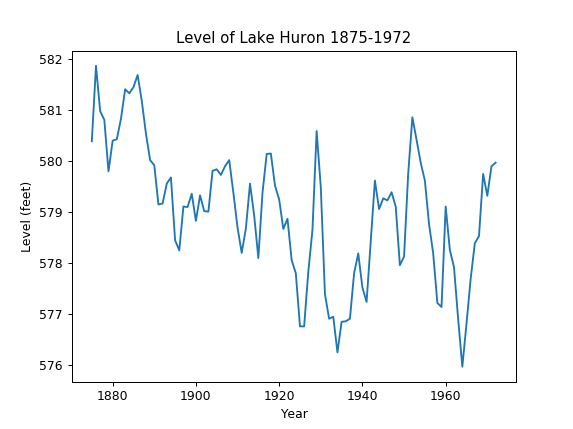

In [95]:
## 4 marks
### BEGIN SOLUTION
huron = np.loadtxt('data/lake_huron.txt')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(huron[:,0], huron[:,1])
ax.set_title("Level of Lake Huron 1875-1972")
ax.set_xlabel("Year")
ax.set_ylabel("Level (feet)")

# Marking scheme:
# 2 points line plot
# 1 point axis labels (must include units and description)
# 1 point title

### END SOLUTION

### Caption [1 mark]
### BEGIN SOLUTION
### END SOLUTION

B)
* Data file: `data/cars_stopping_1920s.txt`
* Description: The data give the speed of cars and the distances taken to stop in the 1920s.
* Columns:

      speed(mph)    stopping_distance(feet)


<IPython.core.display.Javascript object>


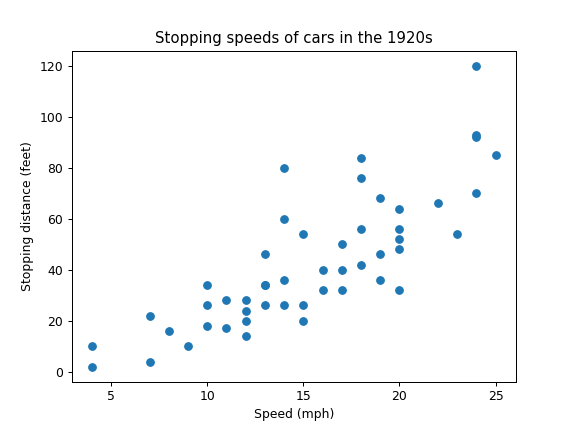

In [96]:
## 4 marks
### BEGIN SOLUTION
cars = np.loadtxt('data/cars.txt')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(cars[:,0], cars[:,1])
ax.set_title("Stopping speeds of cars in the 1920s")
ax.set_xlabel("Speed (mph)")
ax.set_ylabel("Stopping distance (feet)")

# Marking scheme:
# 2 points scatter plot
# 1 point axis labels (must include units and description)
# 1 point title

### END SOLUTION

### Caption [1 mark]
### BEGIN SOLUTION
### END SOLUTION

C) 
* Data file: `data/florida.txt`
* Description: Vote by county in Florida for President in the 2000 election.  One row for each county.
* Columns:
   
       G. W. Bush (votes)     A. Gore (votes)



<IPython.core.display.Javascript object>


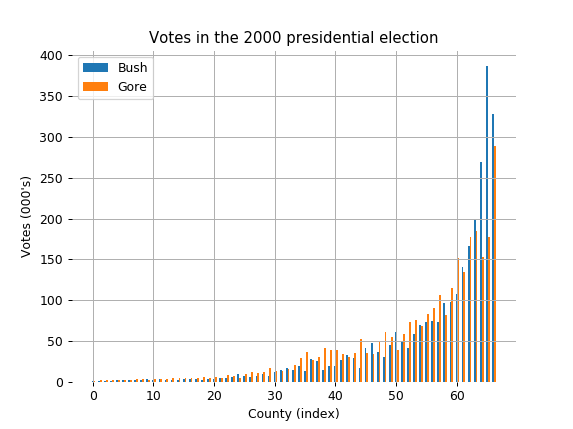

<IPython.core.display.Javascript object>


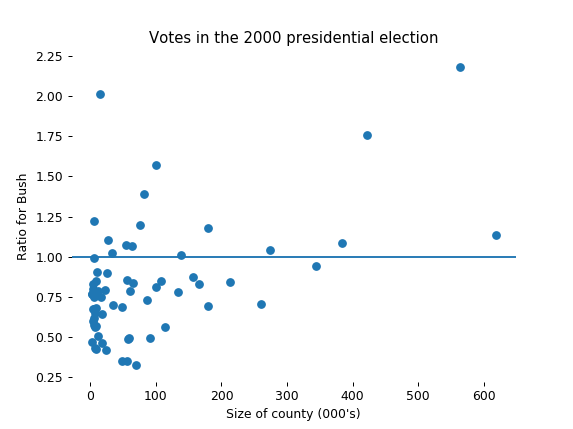

In [97]:
## 6 marks
### BEGIN SOLUTION

## there are lots of ways of plotting this dataset. Here are two.

# plot the votes in each county as a bar chart
votes = np.loadtxt('data/florida.txt')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# pre-sort by county size for easier viewing
vote_order = np.argsort(np.sum(votes, axis=1))
votes = votes[vote_order]

ax.bar(np.arange(votes.shape[0]), votes[:,0]/1000, label="Bush", width=0.3)
ax.bar(np.arange(votes.shape[0])+0.3, votes[:,1]/1000, label="Gore", width=0.3)

ax.set_title("Votes in the 2000 presidential election")
ax.set_xlabel("County (index)")
ax.set_ylabel("Votes (000's)")
ax.set_frame_on(False)
ax.grid(True)
ax.legend()

# this is an alternative solution that would still be valid
# we haven't said how to interpret the data
# plot ratio of votes for Bush against the size of each county
fig = plt.figure()
total = votes[:,0] + votes[:,1]
ax = fig.add_subplot(1,1,1)
ax.scatter(total/1000.0, votes[:,0]/votes[:,1])

ax.set_title("Votes in the 2000 presidential election")
ax.set_xlabel("Size of county (000's)")
ax.set_ylabel("Ratio for Bush")
ax.set_frame_on(False)
ax.axhline(1.0)

# Marking scheme:
# 2 points sensible choice of plot
# 1 point ordering the data sensibly (not the default order)
# 2 point axis labels (must include units and description) and legend (if required)
# 1 point title

### END SOLUTION

### Caption [1 mark]
### BEGIN SOLUTION
### END SOLUTION

# 2. Layered and faceted plots [15 minutes]

A **layered** plot has more than one set of geoms overlaid on the same coordinate system. A **faceted** plot uses multiple coordinate systems to show different views of the data.

For the dataset below, create both a **faceted** plot and a **layered** plot, in two separate figures (one for the faceted, one for the layered). Remember to get all the details correct. Show **markers** on the specific measurements as well as the overall trend.


A)
* Data file `data/puromycin.txt`
* Description: Reaction velocity versus substrate concentration in an enzymatic reaction involving untreated cells or cells treated with Puromycin.
* Split: split the data according to the `treated` condition to make up the facets/layers.
* Columns:

        concentration (parts per million)      rate (counts/min^2)     treated (0 or 1)
    


<IPython.core.display.Javascript object>


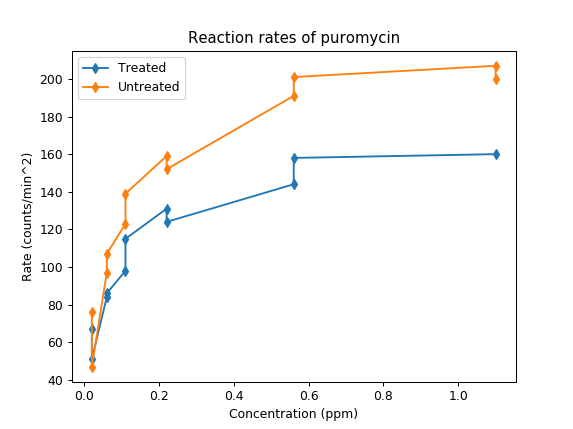

In [98]:
# 3 marks
# put the *layered* solution here
### BEGIN SOLUTION
puromycin = np.loadtxt('data/puromycin.txt')

# split into two sections
untreated = puromycin[puromycin[:,2] == 0, :]
treated = puromycin[puromycin[:,2] == 1, :]

# Figure 1: layered
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(treated[:,0], treated[:,1], label='Treated', marker='d', linestyle='-')
plt.plot(untreated[:,0], untreated[:,1], label='Untreated', marker='d', linestyle='-')
ax.legend()
ax.set_title("Reaction rates of puromycin")
ax.set_xlabel("Concentration (ppm)")
ax.set_ylabel("Rate (counts/min^2)")
# Marking scheme
# 1 point layering plots
# 1 point making layers distinct
# 1 point axis labels and legend
### END SOLUTION

### Caption
### BEGIN SOLUTION
### END SOLUTION

<IPython.core.display.Javascript object>


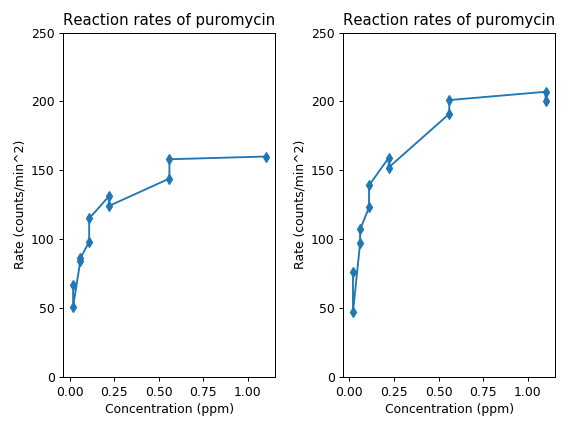

In [99]:
# 3 marks
# put the faceted solution here
# Figure 2: faceted
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.plot(treated[:,0], treated[:,1], label='Treated', marker='d', linestyle='-')
ax.set_title("Reaction rates of puromycin")
ax.set_xlabel("Concentration (ppm)")
ax.set_ylabel("Rate (counts/min^2)")
ax.set_ylim(0,250) # must set ylimit to get scaling correct

ax = fig.add_subplot(1,2,2)
plt.plot(untreated[:,0], untreated[:,1], label='Untreated', marker='d', linestyle='-')
ax.set_title("Reaction rates of puromycin")
ax.set_xlabel("Concentration (ppm)")
ax.set_ylabel("Rate (counts/min^2)")
ax.set_ylim(0,250)
plt.tight_layout()

# Marking scheme
# 1 point faceting plots
# 1 point correct axes on both plots
# 1 point axis labels and legend

### Caption
### BEGIN SOLUTION
### END SOLUTION

# 3. Some uncertainty [1 hour]

You are provided with data on diamond pricing. 


* Data file: `data/diamonds.txt`
* Description: Sale price of diamonds according to multiple factors, including clarity, size, cut quality and colour.
* Columns:

            weight(carat) cut(0-4) colour(0-6) clarity(0-7) cut_angle(deg) sale_price($) 





* Instructions: Plot the price *per carat*, grouping by **colour**, using each of the three plotting methods described below. Think about how to split the data into groups. (hint: it is fine to use a `for` loop...)

* Plot the data, on three separate figures, using:
    * A simple bar chart of the means.
    * A barchart showing the means, and half a standard deviation above and below the mean. Find a way to show this interval (hint: look at the [`plt.bar` documentation](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html)). The standard deviation of an array can be computed by `np.std(x, axis)`, just like `np.mean()`.
    * A Box plot of the values.

* Mark the ticks on the x axis using the real colour categories for diamonds. The mapping from the number to the colour letter used in diamond grading is 

        0=D, 1=E, 2=F, 3=G, 4=H, 5=I, 6=J.

* For this section, you don't need to write the caption. Assume the caption is:

> Price per carat of diamonds traded on the open market, grouped by colour grade from D through J.



In [100]:
# 5 marks
# load and group the data
### BEGIN SOLUTION
diamonds = np.loadtxt('data/diamonds.txt')

# split into groups; use a for loop to iterate over possible values
groups = []
for i in range(7):
    mask = diamonds[:,2]==i
    groups.append(diamonds[mask,5] / diamonds[mask,0])

# compute means and standard deviations (could also have done this in the loop)
means = [np.mean(group) for group in groups]
stds = [np.std(group) for group in groups]

# Marking scheme
# 3 points splitting the data into groups
# 2 points computing the mean and std. dev. across each group

### END SOLUTION

<IPython.core.display.Javascript object>


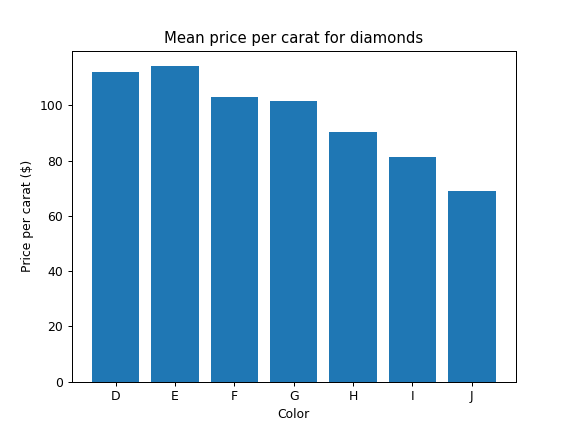

In [101]:
# 2 marks
# plot the means
### BEGIN SOLUTION
# Figure 1: just the means
fig = plt.figure()
ax = fig.add_subplot(1,1,1)    
plt.bar(np.arange(7), means)
ax.set_title("Mean price per carat for diamonds")
ax.set_xlabel("Color")
ax.set_ylabel("Price per carat ($)")
ax.set_xticks(np.arange(7))
ax.set_xticklabels('DEFGHIJ')

# Marking scheme
# 1 point plot
# 1 point all details correct (axis, title, units)
### END SOLUTION

<IPython.core.display.Javascript object>


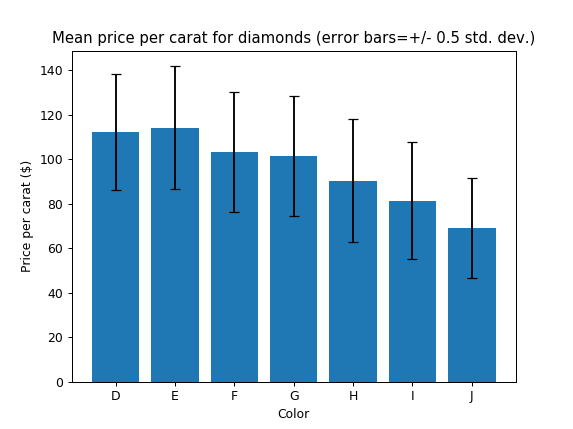

In [102]:
# 2 marks
# plot the means with std. devs.
### BEGIN SOLUTION
# Figure 2: mean +/- std_dev
fig = plt.figure()
ax = fig.add_subplot(1,1,1)    
plt.bar(np.arange(7), means, yerr=0.5*np.array(stds), capsize=4)
ax.set_title("Mean price per carat for diamonds (error bars=+/- 0.5 std. dev.)")
ax.set_xlabel("Color")
ax.set_ylabel("Price per carat ($)")
ax.set_xticks(np.arange(7))
ax.set_xticklabels('DEFGHIJ')
# Marking scheme
# 1 point plot
# 1 point all details correct (axis, title, units)
### END SOLUTION

<IPython.core.display.Javascript object>


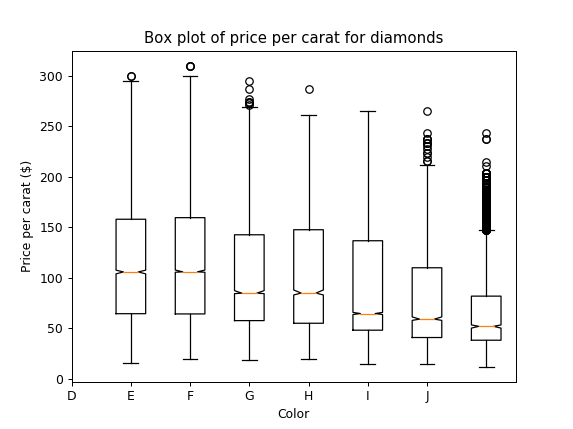

In [103]:
# 3 marks
# a Box plot
### BEGIN SOLUTION
# Figure 3: Box plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)    
# notch and bootstrap are optional -- they just make things look nicer
plt.boxplot(groups, notch=True, bootstrap=1000) 
ax.set_title("Box plot of price per carat for diamonds")
ax.set_xlabel("Color")
ax.set_ylabel("Price per carat ($)")
ax.set_xticks(np.arange(7))
ax.set_xticklabels('DEFGHIJ')
# Marking scheme
# 2 points Box plot
# 1 point all details correct (axis, title, units)
### END SOLUTION

# 4. Constructively criticising visualisations [1 hour]
Write a short criticism of the plots in the text box below each one. Your criticism should reflect upon the scientific and aesthetic quality of the plots. You are provided with the code which generates the plots. Copy the cell that generates the plot and improve any flaws you see.

You criticism should be *a few bullet points* and not more. Note that you can format a bulleted list by using an asterisk at the start of a line:


    * this
    * will
    * be 
    * bulleted
    
when you edit the criticism cell.


## A: Air quality in New York

* Dataset: Air quality measurements from a weather station in New York City.
* Columns

       ozone(ppb) solar_radiation(langs) wind_speed(mph) temp(deg.F) month(0-12) day(0-31)

* Caption:

>    This plot shows the change in ozone levels and solar radiation in NYC over time.
    
*Note: for the answer to this question, you can assume that every month has 31 days.*

<IPython.core.display.Javascript object>


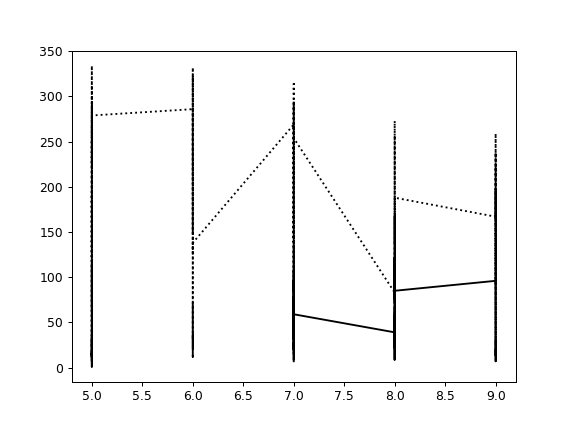

In [104]:
ny_airquality = np.loadtxt("data/ny_airquality.txt")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# name columns
ozone, solar, wind, temp, month, day = np.arange(6)

plt.plot(ny_airquality[:,month], ny_airquality[:,ozone], color='k')
plt.plot(ny_airquality[:,month], ny_airquality[:,solar], color='k',  linestyle=':')

### Criticism [6 marks]
* bullet
* points
### BEGIN SOLUTION
Criticism:
* Overlays two layers with totally different units [1]
* Time is taken as months, not including days [1]
* No axis labels [1]
* No title [1]
* No legend [1]
* Colours are indistinct [1]
### END SOLUTION

<IPython.core.display.Javascript object>


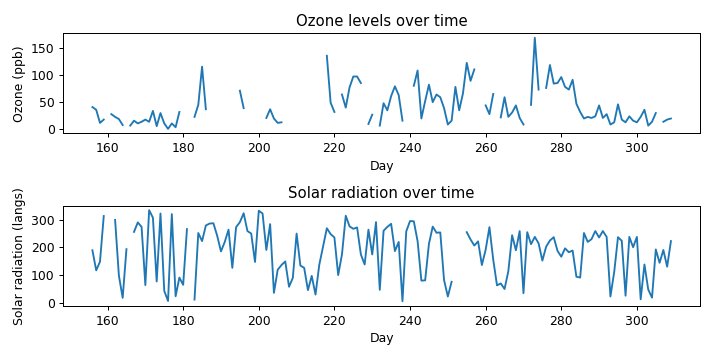

In [105]:
# 12 marks
### BEGIN SOLUTION
fig = plt.figure(figsize=(8,4))

time = ny_airquality[:,-2] * 31 + ny_airquality[:,-1]

ax = fig.add_subplot(2,1,1)
ax.plot(time, ny_airquality[:,0])
ax.set_xlabel("Day")
ax.set_ylabel("Ozone (ppb)")
ax.set_title("Ozone levels over time")
ax = fig.add_subplot(2,1,2)
ax.plot(time, ny_airquality[:,1])
ax.set_xlabel("Day")
ax.set_ylabel("Solar radiation (langs)")
ax.set_title("Solar radiation over time")

## Marking scheme:
# splitting plots: 3 marks
# adding axis labels: 2 marks
# including units in labels: 2 marks
# converting month+day to day: 3 marks
# adding titles to each plot: 2 marks

### END SOLUTION
plt.tight_layout()

## B: Vapour pressure of mercury

* Dataset: Results of an experiment on the effect of temperature on the vapour pressure of mercury. Note: measurements are of pressure are only accurate to +/- 50mmHg.

* Columns

         temp (deg. C)    pressure (mmHg)

* Caption:
> This plot shows the measured vapour pressure of mercury as temperature is adjusted in an experiment.
    


<IPython.core.display.Javascript object>


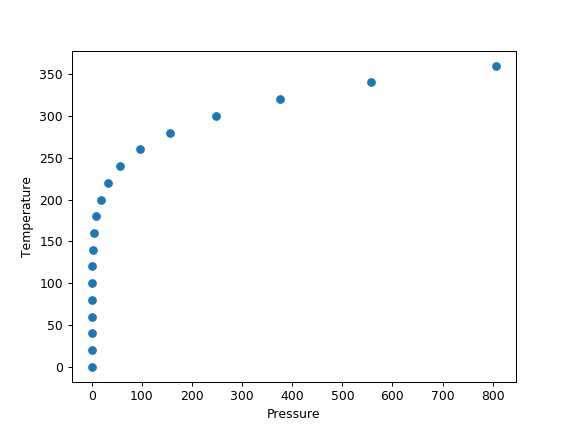

In [106]:
pressure = np.loadtxt("data/pressure.txt")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
press, temp = 0,1
ax.scatter(pressure[:,temp], pressure[:,press])
ax.set_xlabel("Pressure")
ax.set_ylabel("Temperature")

## Criticism [4 marks]
### BEGIN SOLUTION
* independent variable is on y-axis [1]
* labels have no units [1]
* accuracy of experimental measurements are not shown [1]
* no title shown [1]
### END SOLUTION

<IPython.core.display.Javascript object>


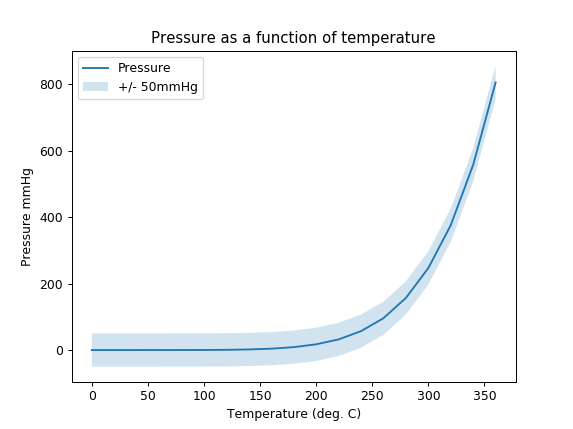

In [107]:
# 5 marks
### BEGIN SOLUTION
pressure = np.loadtxt("data/pressure.txt")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(pressure[:,0], pressure[:,1], label="Pressure")
ax.fill_between(pressure[:,0], pressure[:,1]-50, pressure[:,1]+50, alpha=0.2, label="+/- 50mmHg")
ax.legend()
ax.set_ylabel("Pressure mmHg")
ax.set_xlabel("Temperature (deg. C)")
ax.set_title("Pressure as a function of temperature")

## Marking scheme:
# right axis choice: 1 mark
# adding axis labels: 1 mark
# including uncertianty 1 mark
# appropriate legend 1 mark
# axis labels and title: 1 mark
### END SOLUTION

## C: FTSE100 stock prices

* Dataset: The FTSE100 stock index, over the month up to 01/10/2017.

* Columns

        day   open_price  close_price  high_price  low_price
        
* Caption:

> The range of prices of the FTSE100 index 01/09/2017 to 01/10/2017, including opening and closing prices.


In [110]:
# we'll load this using pandas
# then convert to a numpy array
# NB: you don't need to understand how this part works
# you can just ignore it if you want
import pandas as pd
ftse100_df = pd.read_csv("data/ftse100.csv")
ftse100_df["Date"] = pd.to_datetime(ftse100_df["Date"])
# convert to day delta
ftse100_df.iloc[:,0] = (ftse100_df.Date - ftse100_df.Date.iloc[-22]).dt.days
# select up to last year of data
ftse100 = np.array(ftse100_df)[-22:,:-1]
# Loading complete; we have a numpy array now

<IPython.core.display.Javascript object>


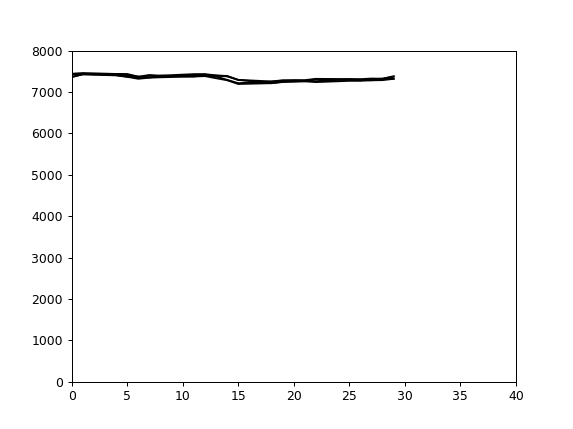

(0, 40)

In [111]:
# plotting code
# copy/modify this part below only. Don't touch the loading code
day, open_price, close_price, high_price, low_price = np.arange(5)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(ftse100[:,day], ftse100[:,open_price], color='k')
ax.plot(ftse100[:,day], ftse100[:,close_price], color='k')
ax.plot(ftse100[:,day], ftse100[:,high_price], color='k')
ax.plot(ftse100[:,day], ftse100[:,low_price], color='k')
ax.set_ylim(0,8000)
ax.set_xlim(0, 40)

### Criticism [5 marks]
### BEGIN SOLUTION
* No axis labels [1]
* y axis starting at 0 is inappropriate [1]
* colours are indistinguishable [1]
* range is not clear from the plot [1]
* no title or legend [1]
### END SOLUTION

<IPython.core.display.Javascript object>


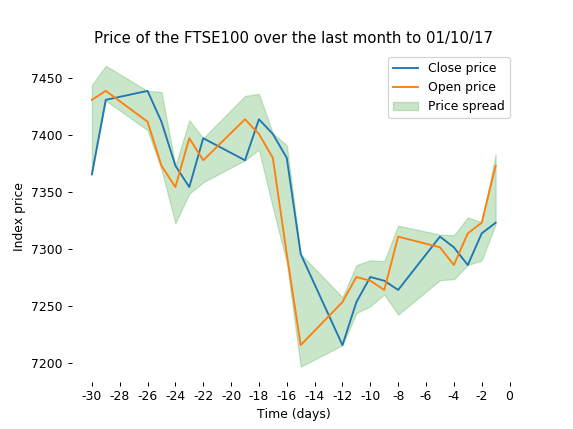

In [118]:
# 6 marks
### BEGIN SOLUTION

day, open_price, close_price, high_price, low_price = np.arange(5)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(ftse100[:,day], ftse100[:,open_price], color='C0', label="Close price")
ax.plot(ftse100[:,day], ftse100[:,close_price], color='C1', label="Open price")

ax.fill_between(ftse100[:,day], ftse100[:,low_price], ftse100[:,high_price], color='C2',
               alpha=0.25, label="Price spread")

ax.set_xlabel("Time (days)")
ax.set_ylabel("Index price")
ax.set_title("Price of the FTSE100 over the last month to 01/10/17")

# optional: [0 marks] set the ticks to count *down* from the end date
ax.set_xticks(np.arange(31)[::2])
ax.set_xticklabels(-np.arange(31)[::-2])
ax.set_frame_on(False)

plt.legend()

## Marking scheme:
# range plotted using ribbon plot: 2 marks
# colours distinct 1 mark
# axis labels: 1 mark
# title and legend 1 mark
# sensible y-axis limits : 1 mark

### END SOLUTION